**PRE-PROCESING THE DATA.**

In [ ]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('data_assignment2.csv')


In [ ]:

print(df.head())
print(df.info())

print(df.describe())


   Unnamed: 0    Country FoodItem UnitofMeasurement  AveragePrice Currency  \
0           0  Australia    Bread              Loaf          2.20      AUD   
1           1  Australia    Bread              Loaf          2.20      AUD   
2           2  Australia    Bread              Loaf          2.20      AUD   
3           3  Australia    Bread              Loaf          2.21      AUD   
4           4  Australia    Bread              Loaf          2.21      AUD   

   PriceinUSD  Availability Quality Year_Month  
0        1.47             1    High     2018-1  
1        1.48             1    High     2018-2  
2        1.48             1    High     2018-3  
3        1.48             1    High     2018-4  
4        1.48             1    High     2018-5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1200 non-n

In [ ]:
df['Month'] = df['Year_Month'].str.split('-').str[1]


In [ ]:
df['Month'] = pd.to_numeric(df['Month'])

In [ ]:
X = df[['Country', 'FoodItem', 'UnitofMeasurement', 'Currency', 'Availability', 'Quality', 'Month']]
y = df['PriceinUSD']


In [ ]:
tscv = TimeSeriesSplit(n_splits=5)


In [ ]:
models = [RandomForestRegressor(), GradientBoostingRegressor()]

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

#  one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Country', 'FoodItem', 'UnitofMeasurement', 'Currency', 'Availability', 'Quality', 'Month'])

# cross validation
models = [RandomForestRegressor(), GradientBoostingRegressor()]

#
all_scores = []

# Iteration
for model in models:

    model_scores = []

    for fold, (train_index, test_index) in enumerate(tscv.split(X_encoded)):
        X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        model_scores.append(mse)

        # mse results
        print(f"Model: {str(model).split('(')[0]}, Fold: {fold}, MSE: {mse}")


    all_scores.append({'Model': str(model).split('(')[0], 'Scores': model_scores})


Model: RandomForestRegressor, Fold: 0, MSE: 0.11397129031979197
Model: RandomForestRegressor, Fold: 1, MSE: 0.6106093274718506
Model: RandomForestRegressor, Fold: 2, MSE: 1.4094476981864552
Model: RandomForestRegressor, Fold: 3, MSE: 0.8061538741134419
Model: RandomForestRegressor, Fold: 4, MSE: 0.07993017556321011
Model: GradientBoostingRegressor, Fold: 0, MSE: 0.11305276313970325
Model: GradientBoostingRegressor, Fold: 1, MSE: 0.63133289937454
Model: GradientBoostingRegressor, Fold: 2, MSE: 1.0386336312116269
Model: GradientBoostingRegressor, Fold: 3, MSE: 0.11543493969399816
Model: GradientBoostingRegressor, Fold: 4, MSE: 0.07013912958485703


In [ ]:
import plotly.graph_objects as go

# Create a dataframe
scores_df = pd.DataFrame()
for model_scores in all_scores:
    scores_df = pd.concat([scores_df, pd.DataFrame(model_scores)], ignore_index=True)

# plot
fig = go.Figure()

for model, group in scores_df.groupby('Model'):
    fig.add_trace(go.Scatter(x=group.index, y=group['Scores'], mode='lines+markers', name=model))

# Design of the plot
fig.update_layout(title='Mean Squared Error Across Folds for Different Models',
                  xaxis_title='Fold Number', yaxis_title='Mean Squared Error')

# show plot
fig.show()


In [ ]:
#
all_scores = []

#
models = [RandomForestRegressor(), GradientBoostingRegressor()]

for model in models:
    model_scores = []

    for fold, (train_index, test_index) in enumerate(tscv.split(X_encoded)):
        X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        model_scores.append(mse)

        # print MSE
        print(f"Model: {str(model).split('(')[0]}, Fold: {fold}, MSE: {mse}")

    # storing scores
    all_scores.append({'Model': str(model).split('(')[0], 'Scores': model_scores})


Model: RandomForestRegressor, Fold: 0, MSE: 0.11267216052560204
Model: RandomForestRegressor, Fold: 1, MSE: 0.6199605050769628
Model: RandomForestRegressor, Fold: 2, MSE: 1.4585731404149194
Model: RandomForestRegressor, Fold: 3, MSE: 0.6485999660076069
Model: RandomForestRegressor, Fold: 4, MSE: 0.0840498216714077
Model: GradientBoostingRegressor, Fold: 0, MSE: 0.11305276313970326
Model: GradientBoostingRegressor, Fold: 1, MSE: 0.598274147475181
Model: GradientBoostingRegressor, Fold: 2, MSE: 1.004730821992061
Model: GradientBoostingRegressor, Fold: 3, MSE: 0.11235577163769658
Model: GradientBoostingRegressor, Fold: 4, MSE: 0.08817824598527287


In [ ]:
print(scores_df.columns)


Index(['Model', 'Scores'], dtype='object')


In [ ]:
df = pd.read_csv('data_assignment2.csv')

In [ ]:
print(df.head())

   Unnamed: 0    Country FoodItem UnitofMeasurement  AveragePrice Currency  \
0           0  Australia    Bread              Loaf          2.20      AUD   
1           1  Australia    Bread              Loaf          2.20      AUD   
2           2  Australia    Bread              Loaf          2.20      AUD   
3           3  Australia    Bread              Loaf          2.21      AUD   
4           4  Australia    Bread              Loaf          2.21      AUD   

   PriceinUSD  Availability Quality Year_Month  
0        1.47             1    High     2018-1  
1        1.48             1    High     2018-2  
2        1.48             1    High     2018-3  
3        1.48             1    High     2018-4  
4        1.48             1    High     2018-5  


# **Which country had the hardest to predict the price  country with the highest error in test set?**

In [ ]:
# Asociate scores for each country
model_country_scores = []
for model_scores in all_scores:
    model_name = model_scores['Model']
    for i, score in enumerate(model_scores['Scores']):
        #
        country = df.loc[i, 'Country']
        model_country_scores.append({'Model': model_name, 'Scores': score, 'Country': country})

# find the country
max_error_country = max(model_country_scores, key=lambda x: x['Scores'])['Country']
print("country with high error:", max_error_country)


country with high error: Australia


In [ ]:
#  one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Country', 'FoodItem', 'UnitofMeasurement', 'Currency', 'Availability', 'Quality', 'Month'])




# **When you increase the `gap` in the TimeSeriesSplit function from 0 to 2, does it improve or decrease the test error?**


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import pandas as pd

# features one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Country', 'FoodItem', 'UnitofMeasurement', 'Currency', 'Availability', 'Quality', 'Month'])

# Evaluating the gap
for gap in range(1, 4):
    tscv = TimeSeriesSplit(n_splits=5, test_size=gap)
    model = RandomForestRegressor()
    scores = cross_val_score(model, X_encoded, y, cv=tscv, scoring='neg_mean_squared_error')
    mean_mse = -scores.mean()
    print(f"Gap: {gap}, Mean Squared Error: {mean_mse}")


Gap: 1, Mean Squared Error: 0.02899504680360352
Gap: 2, Mean Squared Error: 0.024542214743303762
Gap: 3, Mean Squared Error: 0.020754979863560834


## **Put the 4 products into one of the two buckets (only one).**
Products that change the price similarly across all countries.
Products whose prices change are independent of the country. In other words, just because it increased in countries A and B, does not mean it will also increase equally in countries C and D - note equally is important here, as all products will increase in price in all countries over time.


In [ ]:
# group products
df['Category'] = df['FoodItem'].apply(lambda x: 1 if x in ['Bread', 'Milk'] else 2)


In [ ]:
# show products
category_table = df[['FoodItem', 'Category']].drop_duplicates()
print("products and features:")
print(category_table)


products and features:
     FoodItem  Category
0       Bread         1
60       Milk         1
120      Eggs         2
180  Potatoes         2


In [ ]:
import numpy as np

In [ ]:
plt.figure(figsize=(10, 6))
# .


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

# **New Section**
Visualize the hyper-parameters and crossvalidation


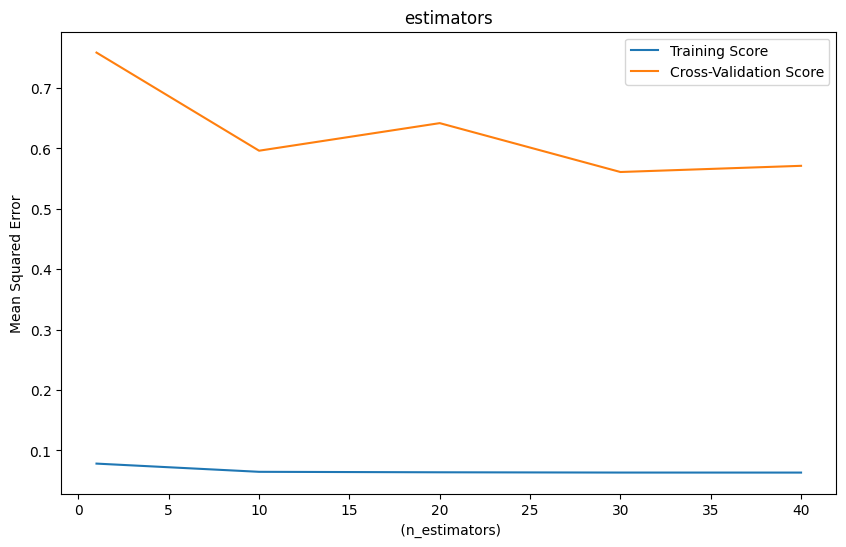

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

# Define hyper-parameters
param_range = [1, 10, 20, 30, 40]  #

# get scores
train_scores, test_scores = validation_curve(
    RandomForestRegressor(),
    X_encoded, y, param_name="n_estimators", param_range=param_range,
    scoring="neg_mean_squared_error", cv=tscv
)

#plot validation
plt.figure(figsize=(10, 6))
plt.plot(param_range, -np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, -np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel(' (n_estimators)')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.title('estimators')
plt.show()


In [ ]:
import plotly.graph_objects as go

# Create a dataframe
scores_df = pd.DataFrame()
for model_scores in all_scores:
    scores_df = pd.concat([scores_df, pd.DataFrame(model_scores)], ignore_index=True)

# plot
fig = go.Figure()

for model, group in scores_df.groupby('Model'):
    fig.add_trace(go.Scatter(x=group.index, y=group['Scores'], mode='lines+markers', name=model))

# Design of the plot
fig.update_layout(title='Mean Squared Error Across Folds for Different Models',
                  xaxis_title='Fold Number', yaxis_title='Mean Squared Error')

# show plot
fig.show()
